In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h1>Times Data<h1>

In [2]:
timesData = pd.read_csv("timesData.csv")

In [3]:
timesData.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [4]:
timesData.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


In [5]:
timesData['year'].value_counts()

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

In [6]:
timesData[timesData['university_name'] == 'Harvard University']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
201,2,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,"20,152",8.9,25%,NaN,2012
605,4,Harvard University,United States of America,94.9,63.7,98.6,99.2,39.9,93.6,"20,152",8.9,25%,NaN,2013
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2015
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016


In [7]:
timesData.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [61]:
def defineFemaleRatio(df):
    """
    Altera a coluna female_male_ratio para que mostre apenas a porcentagem de mulheres na universidade.
    Além disso, remove valores iguais a "-" e os salva como NaN.
    Dessa forma, fica mais fácil de analisar essa coluna. Retorna um novo dataframe sem alterar o df passado
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(df))
    for i in range(len(dfNovo)):
        if (not pd.isna(dfNovo.iloc[i,12])):
            if dfNovo.at[i,'female_male_ratio'] == '-':
                dfNovo.at[i,'female_male_ratio'] = np.nan
            else:
                dfNovo.at[i,'female_male_ratio'] = int(dfNovo.at[i,'female_male_ratio'].strip()[0:2])
    return dfNovo
            
def retiraPorcentagem(df):
    """
    Retira o símbolo de % da coluna 'international_students' e retorna um novo dataset sem modificar o original.
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        if (not pd.isna(dfNovo.iloc[i,11])):
            valorNovo = dfNovo.at[i,'international_students']
            if '%' in valorNovo:
                valorNovo = valorNovo[:-1]
            if valorNovo.strip() not in ['']:
                dfNovo.at[i,'international_students'] = int(valorNovo)
    return dfNovo

def retiraVirgulaNumAlunos(df):
    """
    df: Um dataframe
    Retira a vírgula que separa os números da coluna num_students e os converte para inteiro para que
    possam ser usados como dados em plots. Não altera o dataframe passado. Retorna um novo dataframe
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        if(not pd.isna(df.at[i,'num_students'])):
            dfNovo.at[i,'num_students'] = int(dfNovo.at[i,'num_students'].replace(',','',1))
    return dfNovo

def isFloat(value):
    """
    Retorna True se é possível converter o valor para float e False caso não seja possível
    """
    try:
        float(value)
        return True
    except ValueError:
        return False

def calculaTotalScore(linha):
    """
    linha: Um objeto Series contendo as seguintes colunas:
        teaching, international, research, citations, income e year
        
    Retorna o total_score (arredondado com 1 casa decimal) de uma universidade de acordo
    com as regras da Times. 
    Retorna -1 caso o valor em 'year' não esteja da faixa de (2011-2016) ou caso pelo menos uma das cinco
    categorias não tenha um valor float
    
    O peso de cada categoria varia por ano:
    
        2011:
            peso_teaching: 30%
            peso_income: 2.5%
            peso_citations: 32.5%
            peso_research: 30%
            peso_international: 5%
            
        2012,2013,2014,2015,2016:
            peso_teaching: 30%
            peso_income: 2.5%
            peso_citations: 30%
            peso_research: 30%
            peso_international: 7.5%
         
        total_score = {(teaching*peso_teaching) + (international * peso_international) +
                        (income * peso_income) + (citations * peso_citations) + 
                        (research * peso_research)}/(100)
    
    """
    peso_teaching = 30
    peso_income = 2.5
    peso_citations = 0
    peso_research = 30
    peso_international = 0
    teaching = 0
    income = 0
    citations = 0
    research = 0
    international = 0
    
    if(isFloat(linha['teaching'])):
        teaching = float(linha['teaching'])
    else:
        return -1.0
    
    if(isFloat(linha['income'])):
        income = float(linha['income'])
    else:
        return -1.0
    
    if(isFloat(linha['citations'])):
        citations = float(linha['citations'])
    else:
        return -1.0
    
    if(isFloat(linha['research'])):
        research = float(linha['research'])
    else:
        return -1.0
    
    if(isFloat(linha['international'])):
        international = float(linha['international'])
    else:
        return -1.0
    
    if int(linha['year']) == 2011:
        peso_citations = 32.5
        peso_international = 5
    elif int(linha['year']) in [2012,2013,2014,2015,2016]:
        peso_citations = 30
        peso_international = 7.5
    else:
        return -1.0
    
    total_score = ((teaching*peso_teaching) + (international * peso_international) +
                        (income * peso_income) + (citations * peso_citations) + 
                        (research * peso_research))/(100)
    return float(round(total_score,1))

def completaTotalScores(df):
    """
    df: Um dataframe
    Calcula a nota final de cada universidade se for possível. Caso não seja possível, -1 é colocado como nota.
    Retorna um novo dataframe sem alterar o df passado
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        novaNota = 0
        novaNota = calculaTotalScore(dfNovo.iloc[i])
        dfNovo.at[i,'total_score'] = novaNota
    return dfNovo

def arrumaNomePaises(df):
    """
    Arruma o nome de células que estão com:
    'Unisted States of America' para 'United States of America'
    'Unted Kingdom' para 'United Kingdom'
    """
    dfNovo = df.copy()

    #Index de quem tem o nome 'Unisted States of America'
    idxEUA = dfNovo.index[dfNovo['country'] == 'Unisted States of America']
    for i in range(len(idxEUA)):
        dfNovo.at[idxEUA[i],'country'] = 'United States of America'
    
    #Index de quem tem o nome 'Unted Kingdom'
    idxUK = dfNovo.index[dfNovo['country'] == 'Unted Kingdom']
    for i in range(len(idxUK)):
        dfNovo.at[idxUK[i],'country'] = 'United Kingdom'
    return dfNovo

def trataDadosTimes(df):
    """
    df: Um dataframe, de preferência, o dataset da times original.
    Trata os dados do dataset de acordo com todas as regras existentes que devem ser aplicadas até agora.
    Retorna um novo dataframe sem alterar o original.
    """
    dfNovo = completaTotalScores(df)
    dfNovo = retiraPorcentagem(dfNovo)
    dfNovo = retiraVirgulaNumAlunos(dfNovo)
    dfNovo = defineFemaleRatio(dfNovo)
    dfNovo = arrumaNomePaises(dfNovo)
    return dfNovo

In [36]:
#Tratando os dados da times
timesCompleto = trataDadosTimes(timesData)

In [37]:
timesCompleto.loc[2019]

world_rank                                       201-250
university_name           University of Hawai’i at Mānoa
country                         United States of America
teaching                                              32
international                                       63.4
research                                            35.5
citations                                           67.7
income                                              44.7
total_score                                         46.4
num_students                                         NaN
student_staff_ratio                                  NaN
international_students                               NaN
female_male_ratio                                    NaN
year                                                2016
Name: 2019, dtype: object

In [38]:
timesCompleto.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [39]:
timesCompleto.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243,6.9,27,33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.5,11074,9.0,33,37,2011


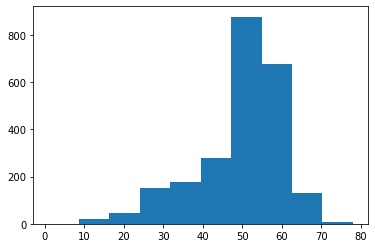

In [40]:
timesCompleto['female_male_ratio'].hist(grid=False,bins=10)

<h1>Separando os países em regiões</h1>

In [51]:
nomesPaises = list(timesCompleto['country'].unique())
sorted(nomesPaises,key=str.upper)

['Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kenya',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Poland',
 'Portugal',
 'Qatar',
 'Republic of Ireland',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Turkey',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States of America']

In [60]:
#Latin America Countries
LTCountries = ["Argentina","Brazil","Chile","Colombia","Mexico"]
#North America Countries
NACountries = ["Canada","United States of America"]
#European Countries without Cyprus
EUCountries = ['Austria','Belarus','Belgium','Czech Republic','Denmark',
               'Estonia','Finland','France','Germany','Greece','Hungary',
               'Iceland','Italy','Latvia','Lithuania','Luxembourg',
               'Netherlands','Norway','Poland','Portugal','Republic of Ireland',
               'Romania','Russian Federation','Serbia','Slovakia',
               'Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom']
#African Countries without Egypt
AFCountries = ['Ghana','Kenya','Morocco','Nigeria','South Africa','Uganda']
#Middle Eastern Countries
MECountries = ['Egypt','Cyprus','Iran','Israel','Jordan','Lebanon',
               'Oman','Qatar','Saudi Arabia','Turkey','United Arab Emirates']
#Asian Countries
ASCountries = ['Bangladesh','China','Hong Kong','India','Indonesia','Japan',
               'Macau','Malaysia','Pakistan','Singapore','South Korea','Taiwan','Thailand']
#Oceania Countries
OCCountries = ['Australia','New Zealand']

In [59]:
sum = len(LTCountries) + len(NACountries)
sum += len(EUCountries) + len(AFCountries)
sum += len(MECountries) + len(ASCountries)
sum += len(OCCountries)
if sum == len(nomesPaises):
    print("Deu certo")
else:
    print(sum)
    print(len(nomesPaises))

Deu certo


In [57]:
for i in range(len(nomesPaises)):
    inLT = nomesPaises[i] in LTCountries
    inNA = nomesPaises[i] in NACountries
    inEU = nomesPaises[i] in EUCountries
    inAF = nomesPaises[i] in AFCountries
    inME = nomesPaises[i] in MECountries
    inAS = nomesPaises[i] in ASCountries
    inOC = nomesPaises[i] in OCCountries
    if (not (inLT or inNA or inEU or inAF or inME or inAS or inOC)):
        print(nomesPaises[i])

New Zealand
Pakistan


In [47]:
timesCompleto[timesCompleto['female_male_ratio'] < 15][['university_name','female_male_ratio','num_students','year']]

,university_name,female_male_ratio,num_students,year
112,Tokyo Institute of Technology,13,9586,2011
307,Tokyo Institute of Technology,13,9586,2012
579,Polytechnic University of Catalonia,12,22893,2012
730,Tokyo Institute of Technology,13,9586,2013
1126,Tokyo Institute of Technology,13,9586,2014
1361,Indian Institute of Technology Kanpur,13,6167,2014
1544,Tokyo Institute of Technology,13,9586,2015
1760,Ewha Womans University,10,17625,2015
2050,Tokyo Institute of Technology,13,9586,2016
2227,Ewha Womans University,10,17625,2016


In [48]:
timesCompleto[timesCompleto['female_male_ratio'] > 70][['university_name','country','female_male_ratio','num_students','year']]

,university_name,country,female_male_ratio,num_students,year
2036,Royal Veterinary College,United Kingdom,77,1819,2016
2037,Rush University,United States of America,71,1855,2016
2388,Soochow University,China,78,36465,2016
2398,United Arab Emirates University,United Arab Emirates,76,9221,2016
2404,Adam Mickiewicz University,Poland,71,40633,2016
2413,Anadolu University,Turkey,78,379231,2016
2540,Qatar University,Qatar,74,9583,2016


In [49]:
timesData[timesData['university_name'] == 'Pontifical Catholic University of Paraná']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2536,601-800,Pontifical Catholic University of Paraná,Brazil,18.4,18.6,6.5,32.2,28.0,-,"7,741",10.9,2%,1 : 99,2016


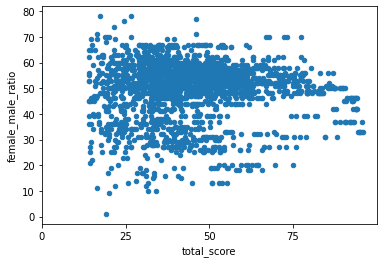

In [115]:
timesCompleto.plot.scatter(x=8,y=12,xticks=range(0,100,25),xlim=(0,100))

In [78]:
LTData = timesCompleto[timesCompleto['country'].isin(LTCountries)]
EUData = timesCompleto[timesCompleto['country'].isin(EUCountries)]
NAData = timesCompleto[timesCompleto['country'].isin(NACountries)]
AFData = timesCompleto[timesCompleto['country'].isin(AFCountries)]
MEData = timesCompleto[timesCompleto['country'].isin(MECountries)]
ASData = timesCompleto[timesCompleto['country'].isin(ASCountries)]
OCData = timesCompleto[timesCompleto['country'].isin(OCCountries)]

No handles with labels found to put in legend.


Text(0.5, 1.0, '% Estudantes internacionais X Pontuação')

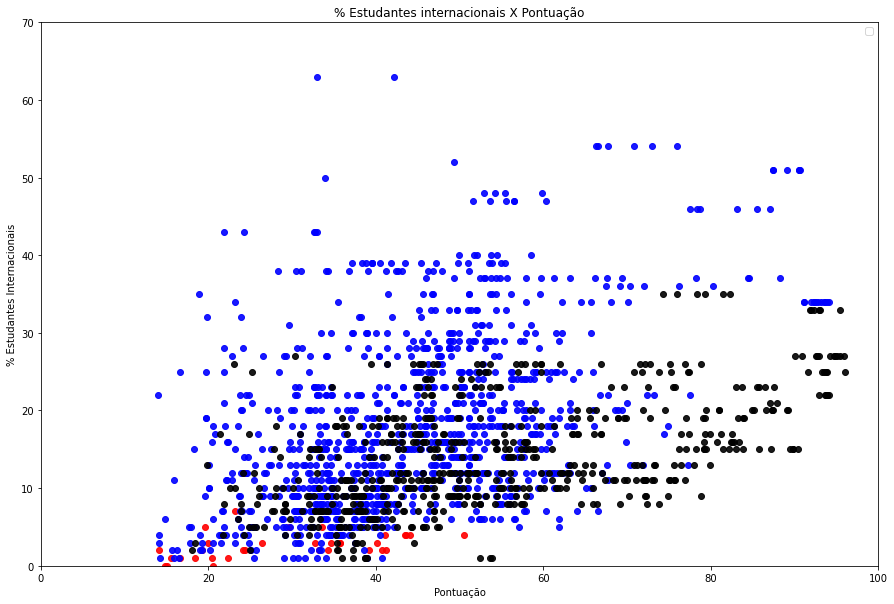

In [101]:
plt.figure(figsize=(15,10))
plt.scatter(y=LTData['international_students'],x=LTData['total_score'],c='red',alpha=0.9)
plt.scatter(y=EUData['international_students'],x=EUData['total_score'],c='blue',alpha=0.9)
plt.scatter(y=NAData['international_students'],x=NAData['total_score'],c='black',alpha=0.9)
plt.legend()
plt.xlim((0,100))
plt.ylim((0,70))
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação")

(0.0, 100.0)

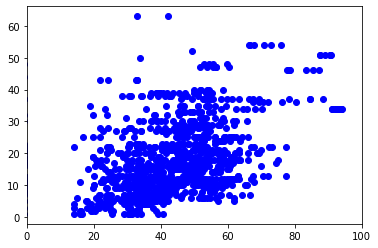

In [80]:
plt.scatter(y=EUData['international_students'],x=EUData['total_score'],c='blue')
plt.xlim((0,100))

(0.0, 100.0)

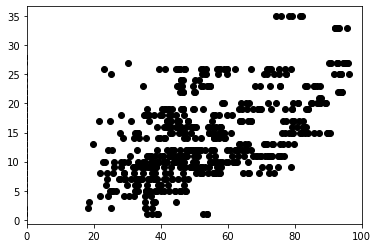

In [82]:
plt.scatter(y=NAData['international_students'],x=NAData['total_score'],c='black')
plt.xlim((0,100))

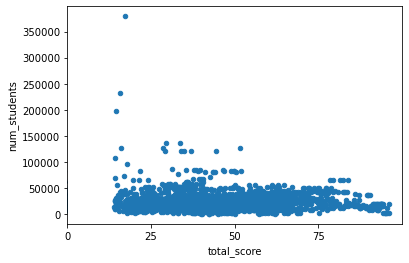

In [96]:
timesCompleto.plot.scatter(x=8,y=9,xticks=range(0,100,25),xlim=(0,100))

In [66]:
rTimes2012[200:210]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
200,201-225,Autonomous University of Barcelona,Spain,33.7,45.9,27.9,57.9,37.0,-,"30,538",12.3,10,59 : 41,2012
201,201-225,Bilkent University,Turkey,27.9,48.5,22.3,60.8,29.4,-,NaN,NaN,NaN,NaN,2012
202,201-225,Cardiff University,United Kingdom,28.9,67.8,34.0,51.7,35.5,-,"23,347",13.1,23,57 : 43,2012
203,201-225,Colorado School of Mines,United States of America,24.6,38.4,22.8,63.7,99.4,-,"5,287",18.2,12,26 : 74,2012
204,201-225,Nagoya University,Japan,45.5,21.2,39.2,43.8,33.1,-,"15,529",7.9,10,29 : 71,2012
205,201-225,National Tsing Hua University,Taiwan,42.7,17.7,44.5,39.7,46.8,-,"10,221",13.5,5,33 : 67,2012
206,201-225,Northeastern University,United States of America,30.4,38.0,18.9,70.0,31.1,-,"18,539",15.1,26,50 : 50,2012
207,201-225,Technion Israel Institute of Technology,Israel,38.7,48.9,45.0,34.0,33.6,-,"13,855",19.4,4,35 : 65,2012
208,201-225,Tulane University,United States of America,28.0,29.8,34.1,58.8,-,-,"11,381",8.4,8,56 : 44,2012
209,201-225,Ulm University,Germany,40.8,50.8,18.8,46.7,69.8,-,"9,187",11.2,10,47 : 53,2012


In [51]:
rTimes2012.iloc[1]['world_rank']

'2'

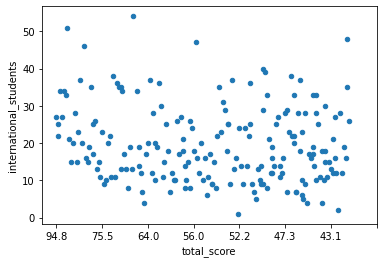

In [67]:
rTimes2012[0:200].plot.scatter(x=8,y=11,xticks=range(0,200,25))

<h1> Shanghai Data<h1>

In [11]:
shData = pd.read_csv('shanghaiData.csv')

In [12]:
shData.head(3)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005


In [13]:
shData[shData['university_name'] == 'Federal University of Minas Gerais']

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
1413,403-510,Federal University of Minas Gerais,4,NaN,0.0,0.0,0.0,6.8,30.9,14.3,2007
1824,303-401,Federal University of Minas Gerais,3-4,NaN,0.0,0.0,7.3,6.6,31.8,15.3,2008
2328,303-401,Federal University of Minas Gerais,3-4,NaN,0.0,0.0,7.3,6.6,33.0,15.8,2009
2825,301-400,Federal University of Minas Gerais,3-5,NaN,0.0,0.0,7.2,5.8,36.6,16.5,2010
3327,301-400,Federal University of Minas Gerais,3-5,NaN,0.0,0.0,7.2,5.5,35.6,16.9,2011
4213,301-400,Federal University of Minas Gerais,2-5,NaN,0.0,0.0,3.6,4.9,37.9,17.9,2014
4816,401-500,Federal University of Minas Gerais,5-6,NaN,0.0,0.0,3.6,4.4,37.0,18.3,2015


In [14]:
shData['year'].value_counts()

2007    510
2008    503
2009    501
2015    500
2011    500
2014    500
2010    500
2006    500
2005    500
2012    284
2013     99
Name: year, dtype: int64

<h1> CWUR Data <h1>

In [15]:
cwData = pd.read_csv('cwurData.csv')

In [16]:
cwData.head(3)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012


In [17]:
cwData['year'].value_counts()

2015    1000
2014    1000
2013     100
2012     100
Name: year, dtype: int64

<h1> Dados Suplementares Gastos<h1>

In [18]:
exData = pd.read_csv("education_expenditure_supplementary_data.csv")

In [19]:
exData.describe()

,1995,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,94.000000,99.000000,106.000000,105.000000,294.000000,301.000000,304.000000,299.000000,282.000000,317.000000,321.000000,308.000000,314.000000,313.000000
mean,3.106383,3.062626,3.142453,3.147619,2.432653,2.433887,2.628947,2.613378,2.573050,2.263722,2.261682,2.326299,2.182803,2.167412
std,1.790465,1.725475,1.752329,1.761233,2.010677,2.089334,2.190668,2.198739,2.130673,1.945664,1.841296,1.852331,1.734693,1.723394
min,0.100000,0.500000,0.300000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,1.200000,1.200000,1.100000,0.600000,0.600000,0.700000,0.650000,0.700000,0.400000,0.700000,0.600000,0.600000,0.600000
50%,3.400000,3.300000,3.450000,3.500000,1.650000,1.600000,1.750000,1.800000,1.750000,1.500000,1.700000,1.700000,1.700000,1.700000
75%,4.500000,4.350000,4.300000,4.300000,4.000000,4.100000,4.425000,4.300000,4.300000,3.900000,3.800000,3.825000,3.575000,3.600000
max,6.800000,6.600000,7.200000,7.200000,7.800000,7.900000,8.000000,8.000000,7.900000,6.900000,6.700000,6.700000,6.400000,6.400000


In [20]:
exData.head(3)

,country,institute_type,direct_expenditure_type,1995,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.0,4.8,5.1,5.4,5.4,5.3,4.7,4.3,4.4,4.1,4.0
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.3,3.7,3.7,4.5,4.6,4.3,4.3,3.9,3.9,4.0,3.9
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.2,5.1,5.2,5.7,5.6,5.5,4.9,4.7,4.7,4.6,4.6


In [21]:
dataBr = exData[exData['country'] == 'Brazil']
dataBr

,country,institute_type,direct_expenditure_type,1995,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
35,Brazil,All Institutions,Public,NaN,NaN,4.4,4.4,5.2,5.3,5.5,5.6,5.9,5.6,5.2,NaN,NaN,NaN
72,Brazil,Elementary and Secondary Institutions,Public,NaN,NaN,3.3,3.3,4.0,4.1,4.3,4.3,4.4,4.6,4.3,NaN,NaN,NaN
109,Brazil,Higher Education Institutions,Public,NaN,NaN,0.8,0.8,0.8,0.8,0.8,0.9,0.9,0.9,0.9,NaN,NaN,NaN
146,Brazil,All Institutions,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
183,Brazil,Elementary and Secondary Institutions,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
220,Brazil,Higher Education Institutions,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
257,Brazil,All Institutions,Total,NaN,NaN,NaN,NaN,5.2,5.3,5.5,5.6,NaN,5.6,5.2,4.9,NaN,NaN
294,Brazil,Elementary and Secondary Institutions,Total,NaN,NaN,NaN,NaN,4.0,4.1,4.3,4.3,NaN,4.6,4.3,4.1,NaN,NaN
331,Brazil,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,0.8,0.8,0.8,0.9,NaN,0.9,0.9,0.8,NaN,NaN


In [22]:
linha = dataBr.iloc[6]
linha

country                              Brazil
institute_type             All Institutions
direct_expenditure_type               Total
1995                                    NaN
2000                                    NaN
2005                                    NaN
2006                                    NaN
2007                                    5.2
2008                                    5.3
2009                                    5.5
2010                                    5.6
2011                                    NaN
2012                                    5.6
2013                                    5.2
2014                                    4.9
2015                                    NaN
2016                                    NaN
Name: 257, dtype: object